In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import set_config

set_config(print_changed_only=False)


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

%config InlineBackend.figure_format='svg'
plt.rcParams['figure.dpi']=120

pd.options.display.float_format='{:,.2f}'.format
pd.set_option('display.max_colwidth', None)


<h1 style='color:blue' align="center">Support Vector Machine Tutorial Using Python Sklearn</h1>
<img src='./data/svm.jpg' style='widths: 600px'>

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

<img height=300 width=300 src="./data/iris_petal_sepal.png" />

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [5]:
iris.target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.10,3.50,1.40,0.20
1,4.90,3.00,1.40,0.20
2,4.70,3.20,1.30,0.20
3,4.60,3.10,1.50,0.20
4,5.00,3.60,1.40,0.20


In [9]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.10,3.50,1.40,0.20,0
1,4.90,3.00,1.40,0.20,0
2,4.70,3.20,1.30,0.20,0
3,4.60,3.10,1.50,0.20,0
4,5.00,3.60,1.40,0.20,0


In [10]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.00,3.20,4.70,1.40,1
51,6.40,3.20,4.50,1.50,1
52,6.90,3.10,4.90,1.50,1
53,5.50,2.30,4.00,1.30,1
54,6.50,2.80,4.60,1.50,1


In [11]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.30,3.30,6.00,2.50,2
101,5.80,2.70,5.10,1.90,2
102,7.10,3.00,5.90,2.10,2
103,6.30,2.90,5.60,1.80,2
104,6.50,3.00,5.80,2.20,2


In [12]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.10,3.50,1.40,0.20,0,setosa
1,4.90,3.00,1.40,0.20,0,setosa
2,4.70,3.20,1.30,0.20,0,setosa
3,4.60,3.10,1.50,0.20,0,setosa
4,5.00,3.60,1.40,0.20,0,setosa


In [13]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.80,3.00,1.40,0.30,0,setosa
46,5.10,3.80,1.60,0.20,0,setosa
47,4.60,3.20,1.40,0.20,0,setosa
48,5.30,3.70,1.50,0.20,0,setosa
49,5.00,3.30,1.40,0.20,0,setosa
50,7.00,3.20,4.70,1.40,1,versicolor
51,6.40,3.20,4.50,1.50,1,versicolor
52,6.90,3.10,4.90,1.50,1,versicolor
53,5.50,2.30,4.00,1.30,1,versicolor
54,6.50,2.80,4.60,1.50,1,versicolor


In [14]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

**Sepal length vs Sepal Width (Setosa vs Versicolor)**

Text(0.5, 0, 'Sepal Length')

Text(0, 0.5, 'Sepal Width')

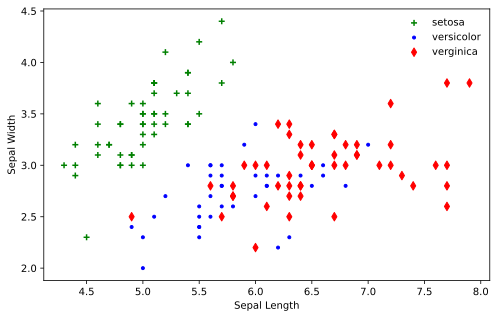

In [16]:
plt.rcParams['figure.figsize']=(8, 5)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+', label='setosa')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.', label='versicolor')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'],color="red",marker='d', label='verginica')
plt.legend(frameon=False)

**Petal length vs Pepal Width (Setosa vs Versicolor)**

<Figure size 576x360 with 0 Axes>

Text(0.5, 0, 'Petal Length')

Text(0, 0.5, 'Petal Width')

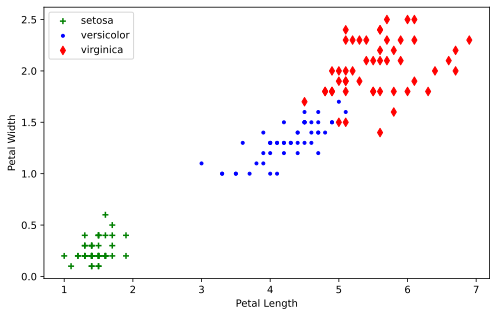

In [17]:
plt.figure(figsize=(8,5))

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+', label='setosa')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.', label='versicolor')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'],color="red",marker='d', label='virginica')
plt.legend()

**Train Using Support Vector Machine (SVM)**

In [18]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
len(X_train)

120

In [21]:
len(X_test)

30

In [22]:
# from sklearn.svm import SVC
model = SVC()

In [23]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
model.score(X_test, y_test)

0.9666666666666667

In [25]:
predicted=model.predict([[4.8,3.0,1.5,0.3]])

def name_predicted(predicted):
    if predicted[0]==0:
        print(f'The predicted flower name is "Setosa"')
        
    elif predicted[0]==1:
        print(f'The predicted flower name is "Versicolor"')
    else:
        print(f'The predicted flower name is "Verginica"')
        
name_predicted(predicted)

The predicted flower name is "Setosa"


C:\Users\Kwang-Chul Kwon\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


### Tuning Parameters
https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167

- Most of the machine learning and deep learning algorithms have some parameters that can be adjusted which are called **hyperparameters**. We need to set hyperparameters before we train the models. Hyperparameters are very critical in building robust and accurate models.  They help us find the balance between bias and variance and thus, prevent the model from overfitting or underfitting.


- SVM creates a **decision boundary** which makes the distinction between two or more classes. How to draw or determine the decision boundary is the most critical part in SVM algorithms.  A standard SVM tries to separate all positive and negative examples (i.e. two different classes) and does not allow any points to be misclassified. This results in an **overfit model** or, in some cases, a decision boundary cannot be found with a standard SVM. An overfit SVM achieves a high accuracy with training set but will not perform well on new, previously unseen examples. This model would be very sensitive to noise and even very small changes in data point values may change the classification results. 


- To overcome this issue, in 1995, Cortes and Vapnik, came up with the idea of **“soft margin** SVM which allows some examples to be misclassified or be on the wrong side of decision boundary. Soft margin SVM often result in a better generalized model.


- There are some misclassified points but we end up having a more generalized model. When determining the decision boundary, a soft margin SVM tries to **solve an optimization problem** with the following goals:

    - Increase the distance of decision boundary to classes (or support vectors)
    - Maximize the number of points that are correctly classified in the training set
    

- There is obviously a **trade-off between these two goals**. Decision boundary might have to be very close to one particular class to correctly label all data points in training set. However, in this case, accuracy on test dataset might be lower because decision boundary is too sensitive to noise and to small changes in the independent variables. On the other hand, a decision boundary might be placed as far as possible to each class with the expense of some misclassified exceptions. This trade-off is controlled by **c parameter**.


- **C parameter adds a penalty for each misclassified data point**. <br> - If **c is small**, the penalty for misclassified points is low so a **decision boundary with a large margin** is chosen at the expense of a greater number of misclassifications. <br> - If **c is large**, SVM tries to minimize the number of misclassified examples due to high penalty which results in a **decision boundary with a smaller margin**. Penalty is not same for all misclassified examples. It is directly proportional to the distance to decision boundary.


#### gamma parameter

- **kernel trick**:
 In some cases, data points that are not linearly separable are transformed using kernel functions so that they become linearly separable. Kernel function is kind of a similarity measure. The inputs are original features and the output is a similarity measure in the new feature space. Similarity here means a degree of closeness. It is a **costly operation to actually transform data points to a high-dimensional feature space**. The algorithm does not actually transform the data points to a new, high dimensional feature space. **Kernelized SVM compute decision boundaries in terms of similarity measures in a high-dimensional feature space without actually doing a transformation**.
 

- One of the commonly used **kernel functions is radial basis function (RBF)**. Gamma parameter of RBF controls the distance of influence of a single training point. **Low values of gamma indicates a large similarity radius which results in more points being grouped together**. For **high values of gamma, the points need to be very close to each other** in order to be considered in the same group (or class). Therefore, models with very large gamma values tend to **overfit**.


- As the gamma decreases, the regions separating different classes get more generalized. Very large gamma values result in too specific class regions (overfitting).


#### Gamma vs C parameter

- For a **linear kernel**, we just need to optimize the c parameter. However, if we want to use an **RBF kernel**, both c and gamma parameter need to optimized simultaneously. If gamma is large, the effect of c becomes negligible. If gamma is small, c affects the model just like how it affects a linear model. Typical values for c and gamma are as follows. However, specific optimal values may exist depending on the application:

0.0001 < gamma < 10

0.1 < c < 100

**1. Regularization (C)**

In [26]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

0.9666666666666667

In [27]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

1.0

**2. Gamma**

In [28]:
model_g = SVC(gamma=20)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=20, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

0.8666666666666667

**3. Kernel**

In [29]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
model_linear_kernal.score(X_test, y_test)

1.0

In [31]:
model_rbf_kernal = SVC(kernel='rbf')
model_rbf_kernal.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
model_linear_kernal.score(X_test, y_test)

1.0

**Exercise**

Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits) and then,

1. Measure accuracy of your model using different kernels such as rbf and linear.
2. Tune your model further using regularization and gamma parameters and try to come up with highest accurancy score
3. Use 80% of samples as training data size


In [33]:
from sklearn.datasets import load_digits

digits=load_digits()

In [34]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [35]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [36]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [37]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [38]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [39]:
X=digits.data
y=digits.target

In [40]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3)

In [41]:
model=SVC(kernel='rbf')

In [42]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
model.score(X_test, y_test)

0.9777777777777777

In [44]:
model=SVC(kernel='linear')

In [45]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
model.score(X_test, y_test)

0.9814814814814815